<a href="https://colab.research.google.com/github/Sammyjoon/Test-repo/blob/master/UTensileStrength_sammie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import math
import random
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [188]:
df = pd.read_excel('/content/drive/MyDrive/Rohatgi/Datasets/Just use this data- Mechanical .xlsx')

In [189]:
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Material                           280 non-null    object 
 1   Base Metal                         134 non-null    object 
 2   Density (g/cm^3)                   115 non-null    float64
 3   Aluminum content (wt%)             280 non-null    float64
 4   Graphene content (wt%)             280 non-null    float64
 5   Aluminum Vol                       280 non-null    float64
 6   Graphene Vol                       280 non-null    float64
 7   Graphene (Vol%)                    280 non-null    float64
 8   Aluminum (Vol%)                    280 non-null    float64
 9   Impurities (%)                     150 non-null    float64
 10  Theoretical UTS of AI (MPa)        156 non-null    float64
 11  Theortetical UTS Gr (MPa)          156 non-null    float64

In [190]:
# print(df.isna().sum())
df8 = df.isna().sum()
display(df8)

Material                               0
Base Metal                           146
Density (g/cm^3)                     165
Aluminum content (wt%)                 0
Graphene content (wt%)                 0
Aluminum Vol                           0
Graphene Vol                           0
Graphene (Vol%)                        0
Aluminum (Vol%)                        0
Impurities (%)                       130
Theoretical UTS of AI (MPa)          124
Theortetical UTS Gr (MPa)            124
Theoretical UTS Composite (MPa)      124
Averaged UTS Composite (MPa)         266
Type of Graphene                       0
Manufacturing Process                  0
Heat treatment                         0
Corrosion Potential (Ecorr)          278
Corrosion current density (jcorr)    278
Hardness (VHN)                       116
Fracture Toughness (KQ) (MPa/m)      275
Hardness (GPa)                       273
Brinell Hardness (BHN)               254
Rockwell Hardness (RHN)              275
Tensile Strength

In [191]:
def findBaseMetalStrength(base):
  if base == 'A356.2':
    return 224
  if base == 'AA1060':
    return 69
  if base == 'AA1100':
    return 110
  if base == 'AA2024':
    return 469
  if base == 'AA2124':
    return 483
  if base == 'AA5083':
    return 350
  if base == 'AA6060':
    return 220
  if base == 'AA6061':
    return 310
  if base == 'AA6063':
    return 241
  if base == 'AA6082':
    return 310
  if base == 'AA6351':
    return 310
  if base == 'AA7050':
    return 470
  if base == 'AA7075':
    return 450
# the default strength for missing values
  return base



In [192]:
df2 = df[['Base Metal ','Graphene content (wt%)', 'Type of Graphene', 'Manufacturing Process', 'Heat treatment', 'Tensile strength (MPa)']]

# fing the ultimate tensile strength of base metal

df2 = df2.assign(Base_Metal_Strength=df['Base Metal '].apply(findBaseMetalStrength))
df2 = df2.drop('Base Metal ', axis = 1)
df2.dropna(inplace = True)



In [193]:
#  Base     Tensile Strength (Mpa)
# A356.2             224
# AA1060              69
# AA1100             110
# AA2024             469
# AA2124             483
# AA5083             350
# AA6060             220
# AA6061             310
# AA6063             241
# AA6082             310
# AA6351             310
# AA7050             470
# AA7075             450
#
# https://www.spacematdb.com/spacemat/

## Data Preprocessing



*   Handeling Missing data
*   Handeling Outliers
*   Standardization
*   Split data to Train and Test Set





In [194]:
# Handeling Missing data

# Count NaN values in multiple columns of DataFrame
print(df2.isna().sum())

Graphene content (wt%)    0
Type of Graphene          0
Manufacturing Process     0
Heat treatment            0
Tensile strength (MPa)    0
Base_Metal_Strength       0
dtype: int64


In [195]:
# Count NaN values of whole DataFrame
print(df2.isna().sum().sum())

0


In [196]:
df2

,Graphene content (wt%),Type of Graphene,Manufacturing Process,Heat treatment,Tensile strength (MPa),Base_Metal_Strength
2,0.04,MLG,SPS,Sintering,48.1,310.0
3,0.04,MLG,SPS,Sintering,55.0,310.0
4,0.04,MLG,SPS,Sintering,55.0,310.0
5,0.04,MLG,SPS,Sintering,60.0,310.0
9,0.08,MLG,SPS,Sintering,80.4,310.0
...,...,...,...,...,...,...
228,2.00,MWCNTs,PM Method,None,492.0,310.0
229,2.00,MWCNTs,PM Method,None,497.0,310.0
230,2.00,GNPs,Stir Casting,Preheat,514.0,310.0
231,2.00,GNPs,Stir Casting,None,525.0,450.0


In [197]:
# # Handeling missing values of x with replacing mean

# mean_value = df2['Density (g/cm^3)'].astype(float).mean()
# print(mean_value)

# # Fill NaNs of this column with mean_value
# df2['Density (g/cm^3)'].fillna(value=mean_value, inplace=True)

train = df2.sample(frac=0.8, axis=0)
train

,Graphene content (wt%),Type of Graphene,Manufacturing Process,Heat treatment,Tensile strength (MPa),Base_Metal_Strength
2,0.04,MLG,SPS,Sintering,48.1,310.0
234,2.50,GNPs,Stir Casting,Hot Extruded,575.0,241.0
178,1.00,Graphene Powder,PM,None,320.0,310.0
105,0.50,MWCNTs,PM Method,None,249.0,310.0
176,1.00,GNPs,Stir Casting,None,320.0,450.0
...,...,...,...,...,...,...
11,0.08,MLG,SPS,Sintering,90.0,310.0
51,0.25,GNPs,PM,Sintering,130.6,310.0
140,0.77,GNPs,Stir Casting Method,None,310.0,470.0
28,0.10,MLG,SPS,Sintering,115.0,310.0


In [198]:
# df2 = df2.replace(np.nan, None)

# Converting categorical columns to numerical:

In [199]:

# creating a copy of the original data frame
df3 = df2.copy()

# calling the get_dummies method the first parameter mentions the
# the name of the data frame to store the new data frame in
# the second parameter is the list of columns which if not mentioned returns the dummies for all categorical columns

df3 = pd.get_dummies(df3,
					columns = ['Type of Graphene', 'Manufacturing Process', 'Heat treatment'], drop_first= True)

display(df3)




,Graphene content (wt%),Tensile strength (MPa),Base_Metal_Strength,Type of Graphene_GNSs/GO,Type of Graphene_Graphene Nanoflakes,Type of Graphene_Graphene Powder,Type of Graphene_MLG,Type of Graphene_MWCNT,Type of Graphene_MWCNTs,Type of Graphene_Multi-layered Graphene,...,Heat treatment_Annealed (O Temper),Heat treatment_Annealed(O Temper),Heat treatment_Degassing & Solidification,Heat treatment_Hot Extruded,Heat treatment_Hot Extrusion,Heat treatment_Hot extruded,Heat treatment_None,Heat treatment_Preheat,Heat treatment_Sintering,Heat treatment_T6
2,0.04,48.1,310.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.04,55.0,310.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.04,55.0,310.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.04,60.0,310.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0.08,80.4,310.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2.00,492.0,310.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
229,2.00,497.0,310.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
230,2.00,514.0,310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
231,2.00,525.0,450.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [200]:
# Handeling Outliers



In [201]:
# Standardization RobustScaler



## Data Analysis Using Data Visualization

<ipython-input-202-663318c1ee0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y , fit=norm);



 mu = 262.47 and sigma = 113.44



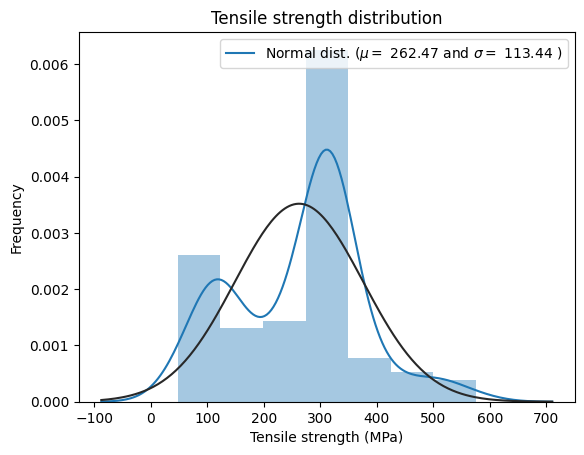

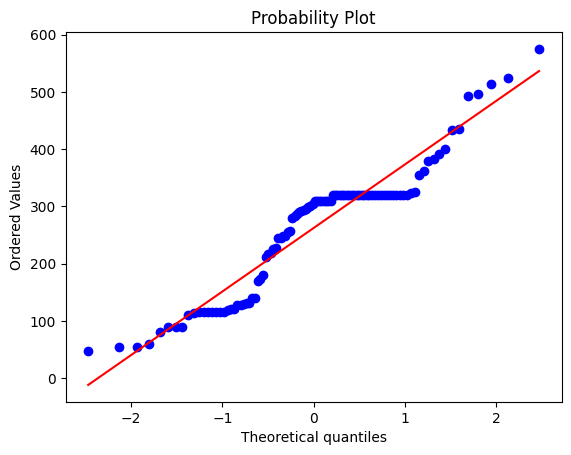

In [202]:
y = df3['Tensile strength (MPa)'].astype(float)
sns.distplot(y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Tensile strength distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

<ipython-input-203-efc55bcf8f23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='coolwarm',annot = True)


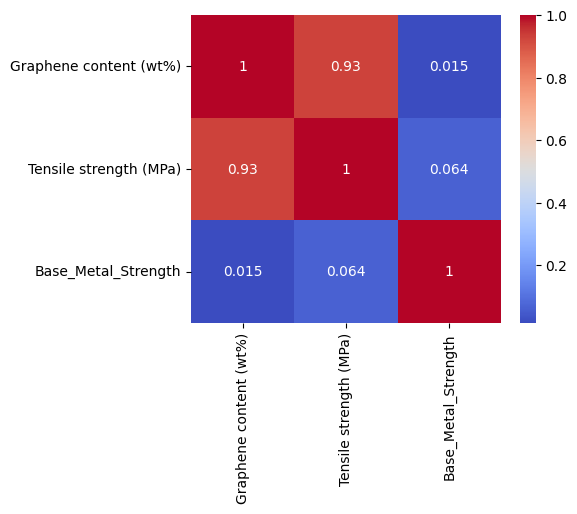

In [203]:
plt.figure(figsize=(5,4))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [204]:
corr = train.corr()
corr

<ipython-input-204-b9937e1ed458>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


,Graphene content (wt%),Tensile strength (MPa),Base_Metal_Strength
Graphene content (wt%),1.000000,0.930704,0.014756
Tensile strength (MPa),0.930704,1.000000,0.064304
Base_Metal_Strength,0.014756,0.064304,1.000000


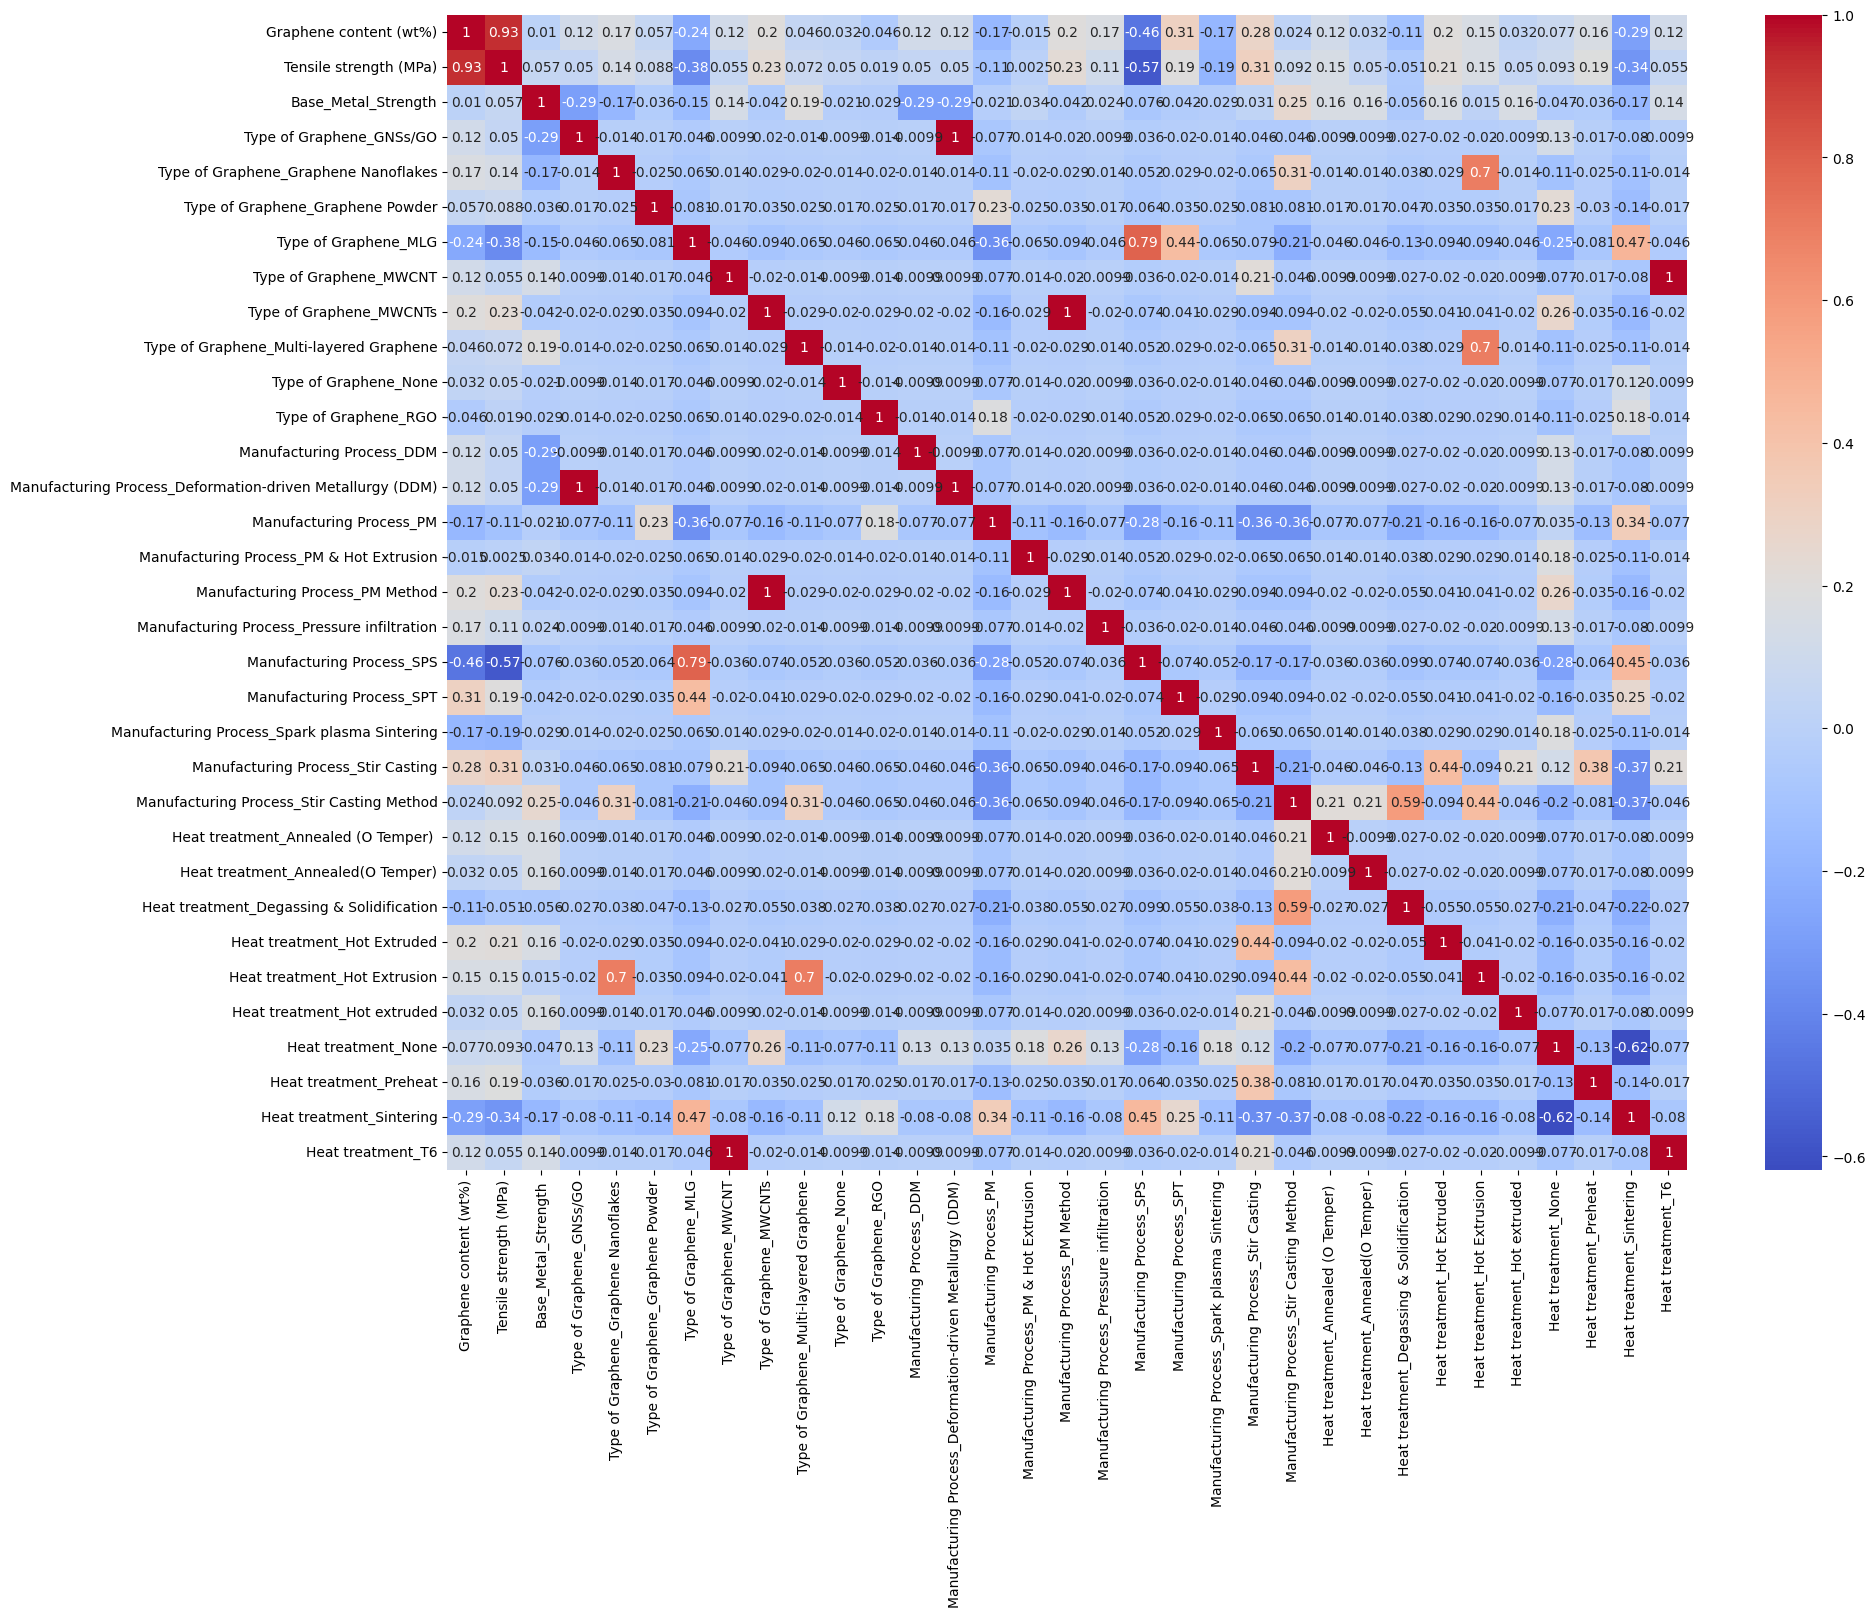

In [205]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),cmap='coolwarm',annot = True)
plt.show()

In [206]:
# find the most correlated input variables with the output
corr = df3.corr()
corr[corr['Tensile strength (MPa)'].apply(abs)>0.3].index

"""
 ['Graphene content (wt%)', 'Tensile strength (MPa)',
       'Type of Graphene_MLG', 'Manufacturing Process_SPS',
       'Manufacturing Process_Stir Casting', 'Heat treatment_Sintering']
"""
# keep only input variables with high corerelation with UTS
df3 = df3[['Graphene content (wt%)', 'Tensile strength (MPa)','Type of Graphene_MLG', 'Manufacturing Process_SPS','Manufacturing Process_Stir Casting', 'Heat treatment_Sintering']]


In [207]:
corr[corr['Tensile strength (MPa)'].apply(abs)>0.3].index

Index(['Graphene content (wt%)', 'Tensile strength (MPa)',
       'Type of Graphene_MLG', 'Manufacturing Process_SPS',
       'Manufacturing Process_Stir Casting', 'Heat treatment_Sintering'],
      dtype='object')

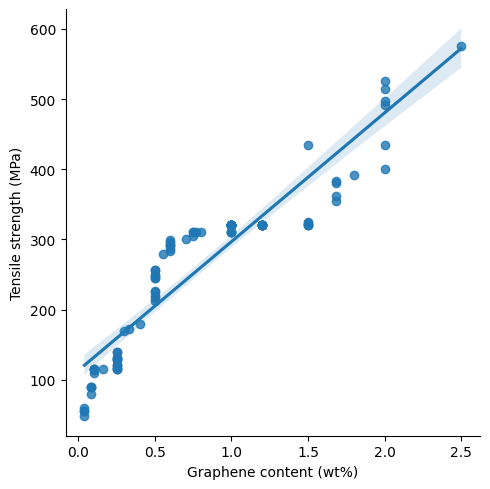

In [208]:
sns.lmplot(x='Graphene content (wt%)',y='Tensile strength (MPa)',data=df3)

In [209]:
# sns.lmplot(x='Type of Graphene_MLG',y='Tensile strength (MPa)',data=df3)

In [210]:
# sns.lmplot(x='Manufacturing Process_SPS',y='Tensile strength (MPa)',data=df3)

In [211]:
# sns.lmplot(x='Manufacturing Process_Stir Casting',y='Tensile strength (MPa)',data=df3)

In [212]:
# sns.lmplot(x='Heat treatment_Sintering',y='Tensile strength (MPa)',data=df3)

## Machine Learning Algorithms

In [213]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Create a numpy array of data:

y = df3['Tensile strength (MPa)'].astype(float)
y = y.to_numpy()
df3 = df3.drop('Tensile strength (MPa)', axis = 1)
# df3 = df3.drop('Base_Metal_Strength', axis = 1)

X = df3.to_numpy()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112, shuffle = True)



In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# sc_x = StandardScaler()
scaler_X = RobustScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)




scaler_y = RobustScaler()
y_train = y_train.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)
# y_train = y_train.reshape(-1, 1)

y_test = y_test.reshape(-1, 1)
# y_test = scaler_y.fit_transform(y_test)

## Linear Regression

In [215]:
# define the regression models
reg_model = LinearRegression().fit(X_train, y_train)

# Calculating the predicted values
y_pred_lr = reg_model.predict(X_test)

In [216]:
# y_test

In [217]:
# y_pred

In [218]:
train_pred_lr = reg_model.predict(X_train)
y_test_lr = scaler_y.transform(y_test)

print('R2 (train): ', r2_score(y_train , train_pred_lr))
print('R2 (test): ', r2_score(y_test_lr , y_pred_lr))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test_lr, y_pred_lr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test_lr, y_pred_lr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_lr, y_pred_lr)))

R2 (train):  0.9037387037395023
R2 (test):  0.8488183261388551
Mean Absolute Error (MAE): 0.15921014362456423
Mean Squared Error (MSE): 0.036949969902698214
Root Mean Squared Error (RMSE): 0.19222374958026964


## Ramdom Forest

In [219]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

y_pred_rf = regressor.predict(X_test)


<ipython-input-219-c3ed7f380b82>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [220]:
train_pred_rf = regressor.predict(X_train)
y_test_rf = scaler_y.transform(y_test)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test_rf))



print('R2 (train): ',r2_score(y_train , train_pred_rf))
print('R2 (test): ',r2_score(y_test_rf , y_pred_rf))

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test_rf, y_pred_rf))
print('Mean Squared Error (MSE):', mean_squared_error(y_test_rf, y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))

0.9836400803836987
0.9738644392907466
R2 (train):  0.9836400803836987
R2 (test):  0.9738644392907466
Mean Absolute Error (MAE): 0.04858380133035196
Mean Squared Error (MSE): 0.006387733095772061
Root Mean Squared Error (RMSE): 0.07992329507579164


In [221]:
# y_train = y_train.reshape((-1,))

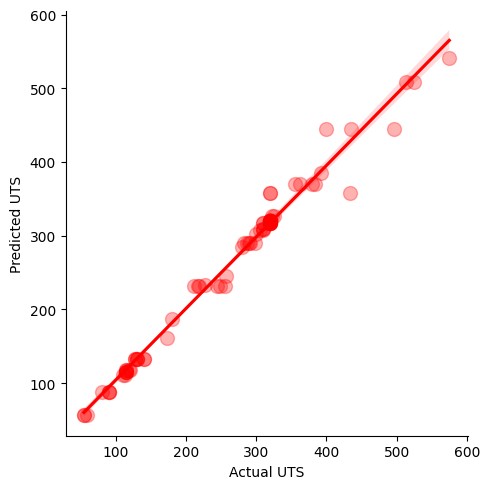

In [222]:
y1 = scaler_y.inverse_transform(y_train.reshape(-1,1)).reshape((-1,))
y2 = scaler_y.inverse_transform(train_pred_rf.reshape(-1,1)).reshape((-1,))
res_rf = pd.DataFrame(list(zip(y1, y2)), columns=['Actual UTS', 'Predicted UTS'])

sns.lmplot(x='Actual UTS',y='Predicted UTS',data=res_rf, line_kws={'color': 'red'}, scatter_kws={'color': 'red', 'alpha': 0.3, 's' : 100})

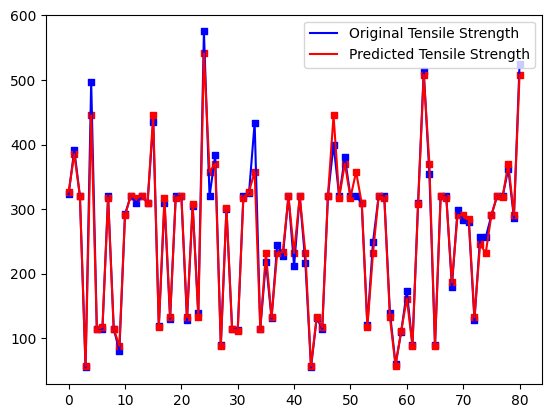

In [228]:
x_ax=range(len(y_train))
plt.scatter(x_ax, scaler_y.inverse_transform( y_train.reshape(-1,1)), s=15, color="blue", marker='s')
plt.plot(x_ax, scaler_y.inverse_transform( y_train.reshape(-1,1)), lw=1.5, color="blue", label="Original Tensile Strength")

plt.scatter(x_ax, scaler_y.inverse_transform( train_pred_rf.reshape(-1,1)), s=15, color="red", marker='s')
plt.plot(x_ax,scaler_y.inverse_transform(train_pred_rf.reshape(-1, 1)), lw=1.5, color="red", label="Predicted Tensile Strength")
plt.legend()
plt.show()

## KNN

In [224]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

knn_model = KNeighborsRegressor(n_neighbors=5)
# print(knn_model)

knn_model.fit(X_train, y_train)

y_pred_knn = regressor.predict(X_train)

In [225]:
score=knn_model.score(X_train, y_train)
print('R2 (train):' , score)
print('R2 (test):' , knn_model.score(X_test, scaler_y.transform(y_test)))

mse =mean_squared_error(y_train, y_pred_knn)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R2 (train): 0.9357404597413933
R2 (test): 0.9378150515697352
Mean Squared Error: 0.006366306404896246
Root Mean Squared Error: 0.07978913713593001


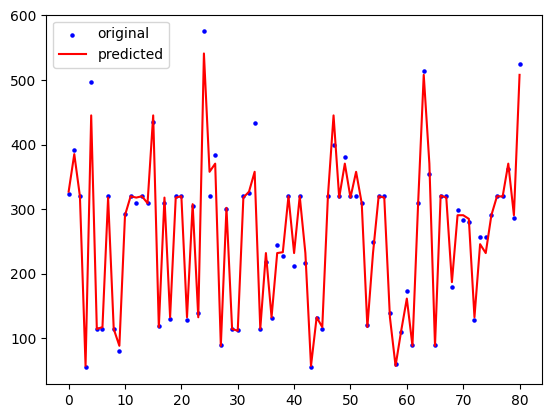

In [226]:
x_ax=range(len(y_train))
plt.scatter(x_ax, scaler_y.inverse_transform( y_train), s=5, color="blue", label="original")
plt.plot(x_ax,scaler_y.inverse_transform( y_pred_knn.reshape(-1, 1)), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()